In [1]:
%load_ext autoreload
%autoreload 2

import ncem

datadir = "/Users/anna.schaar/phd/datasets"

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '/lu/',
    data_origin='luwt',
    radius=200,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


['AEC', 'Erythroid cell', 'Erythroid progenitor', 'Hepatocyte', 'MK', 'Macrophage', 'Myeloid', 'SEC', 'Unknown']
collecting image-wise celldata


 19%|█▉        | 27/140 [00:00<00:00, 264.82it/s]

adding graph-level covariates


100%|██████████| 140/140 [00:00<00:00, 284.17it/s]


Loaded 140 images with complete data from 1 patients over 40864 cells with 132 cell features and 9 distinct celltypes.
Mean of mean node degree per images across images: 16.576537

 Celldata metadata: {'lateral_resolution': 0.1079, 'fn': 'FinalClusteringResults 190517 WT.csv', 'image_col': 'FOV', 'pos_cols': ['Center_x', 'Center_y'], 'cluster_col': 'CellTypeID_new', 'cluster_col_preprocessed': 'CellTypeID_new_preprocessed'}


In [7]:
shapes = []
for k, v in interpreter.data.img_celldata.items():
    if v.shape[0] == 366:
        print(k, v.shape)
    shapes.append(v.shape[0])


135 (366, 132)


In [6]:
import numpy as np
np.max(shapes)

366

         Falling back to preprocessing with `sc.pp.pca` and default params.
n cells:  366


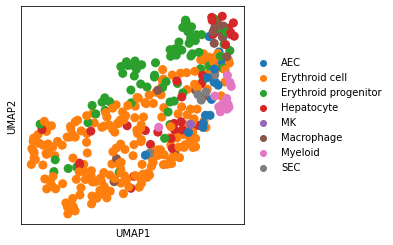

In [8]:
adata = interpreter.data.umap(
    image_key= "135",
    undefined_type='Unknown',
    n_neighbors=10,
    n_pcs=35,
)

Trying to set attribute `.uns` of view, copying.


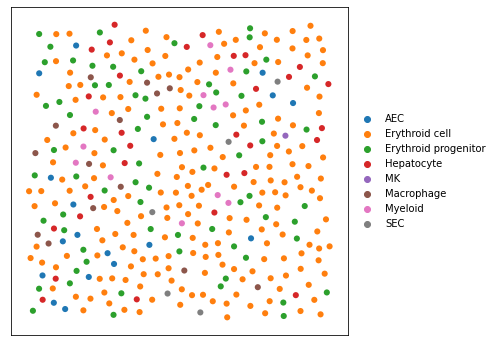

In [3]:
adata = interpreter.data.spatial(
    image_key= "135",
    undefined_type='Unknown',
)

# Supp. Fig. 1: Cell-type centric summary statistics in MERFISH dataset.

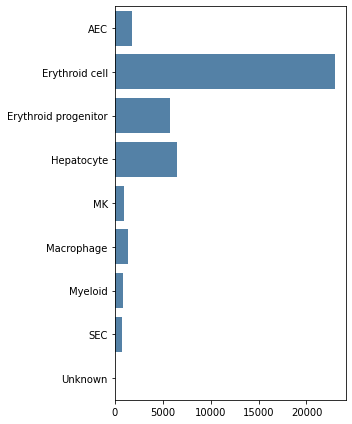

In [3]:
interpreter.data.celltype_frequencies()

0.0
1.0016566713760195
2.1890108099610748
5.100665054494216
14.527116295376848
36.293624327970846
85.35343352824232
169.1223859623992
291.8856690777577
291.8857142857143


/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/ncem/data.py:192: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=10)


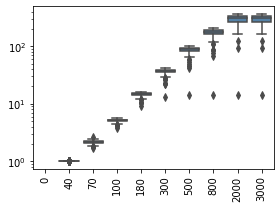

In [14]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 40, 70, 100, 180, 300, 500, 800, 2000],
    #lateral_resolution=1.,
)

# Supp. Fig. 2: Variance decomposition in spatial omics data sets.

  0%|          | 0/140 [00:00<?, ?it/s]/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
100%|██████████| 140/140 [00:19<00:00,  7.00it/s]


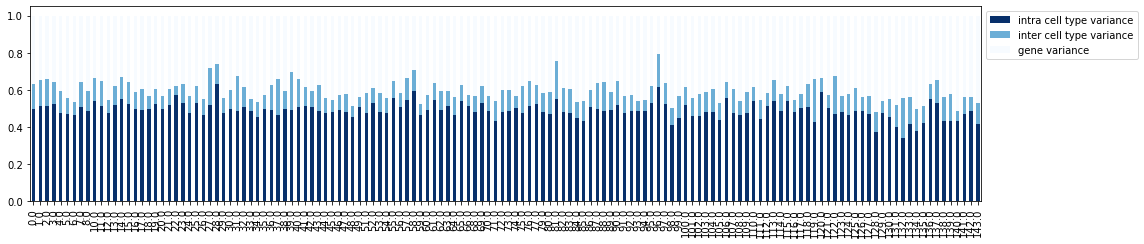

In [9]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(var_decomp)

In [10]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.490804
inter cell type variance    0.105564
gene variance               0.403632
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

100%|██████████| 140/140 [00:08<00:00, 17.49it/s]


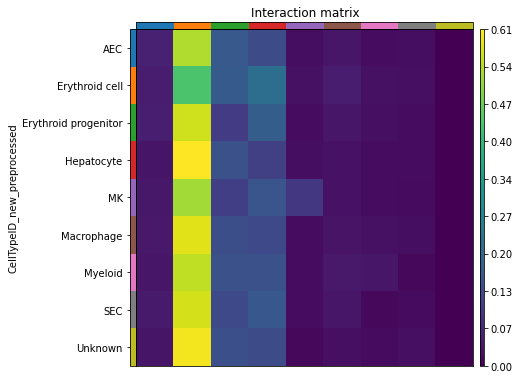

In [21]:
interpreter.data.celldata_interaction_matrix()

# Supp. Fig. 7: Ligand–receptor permutation test.

/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func


n cells: 8172


/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

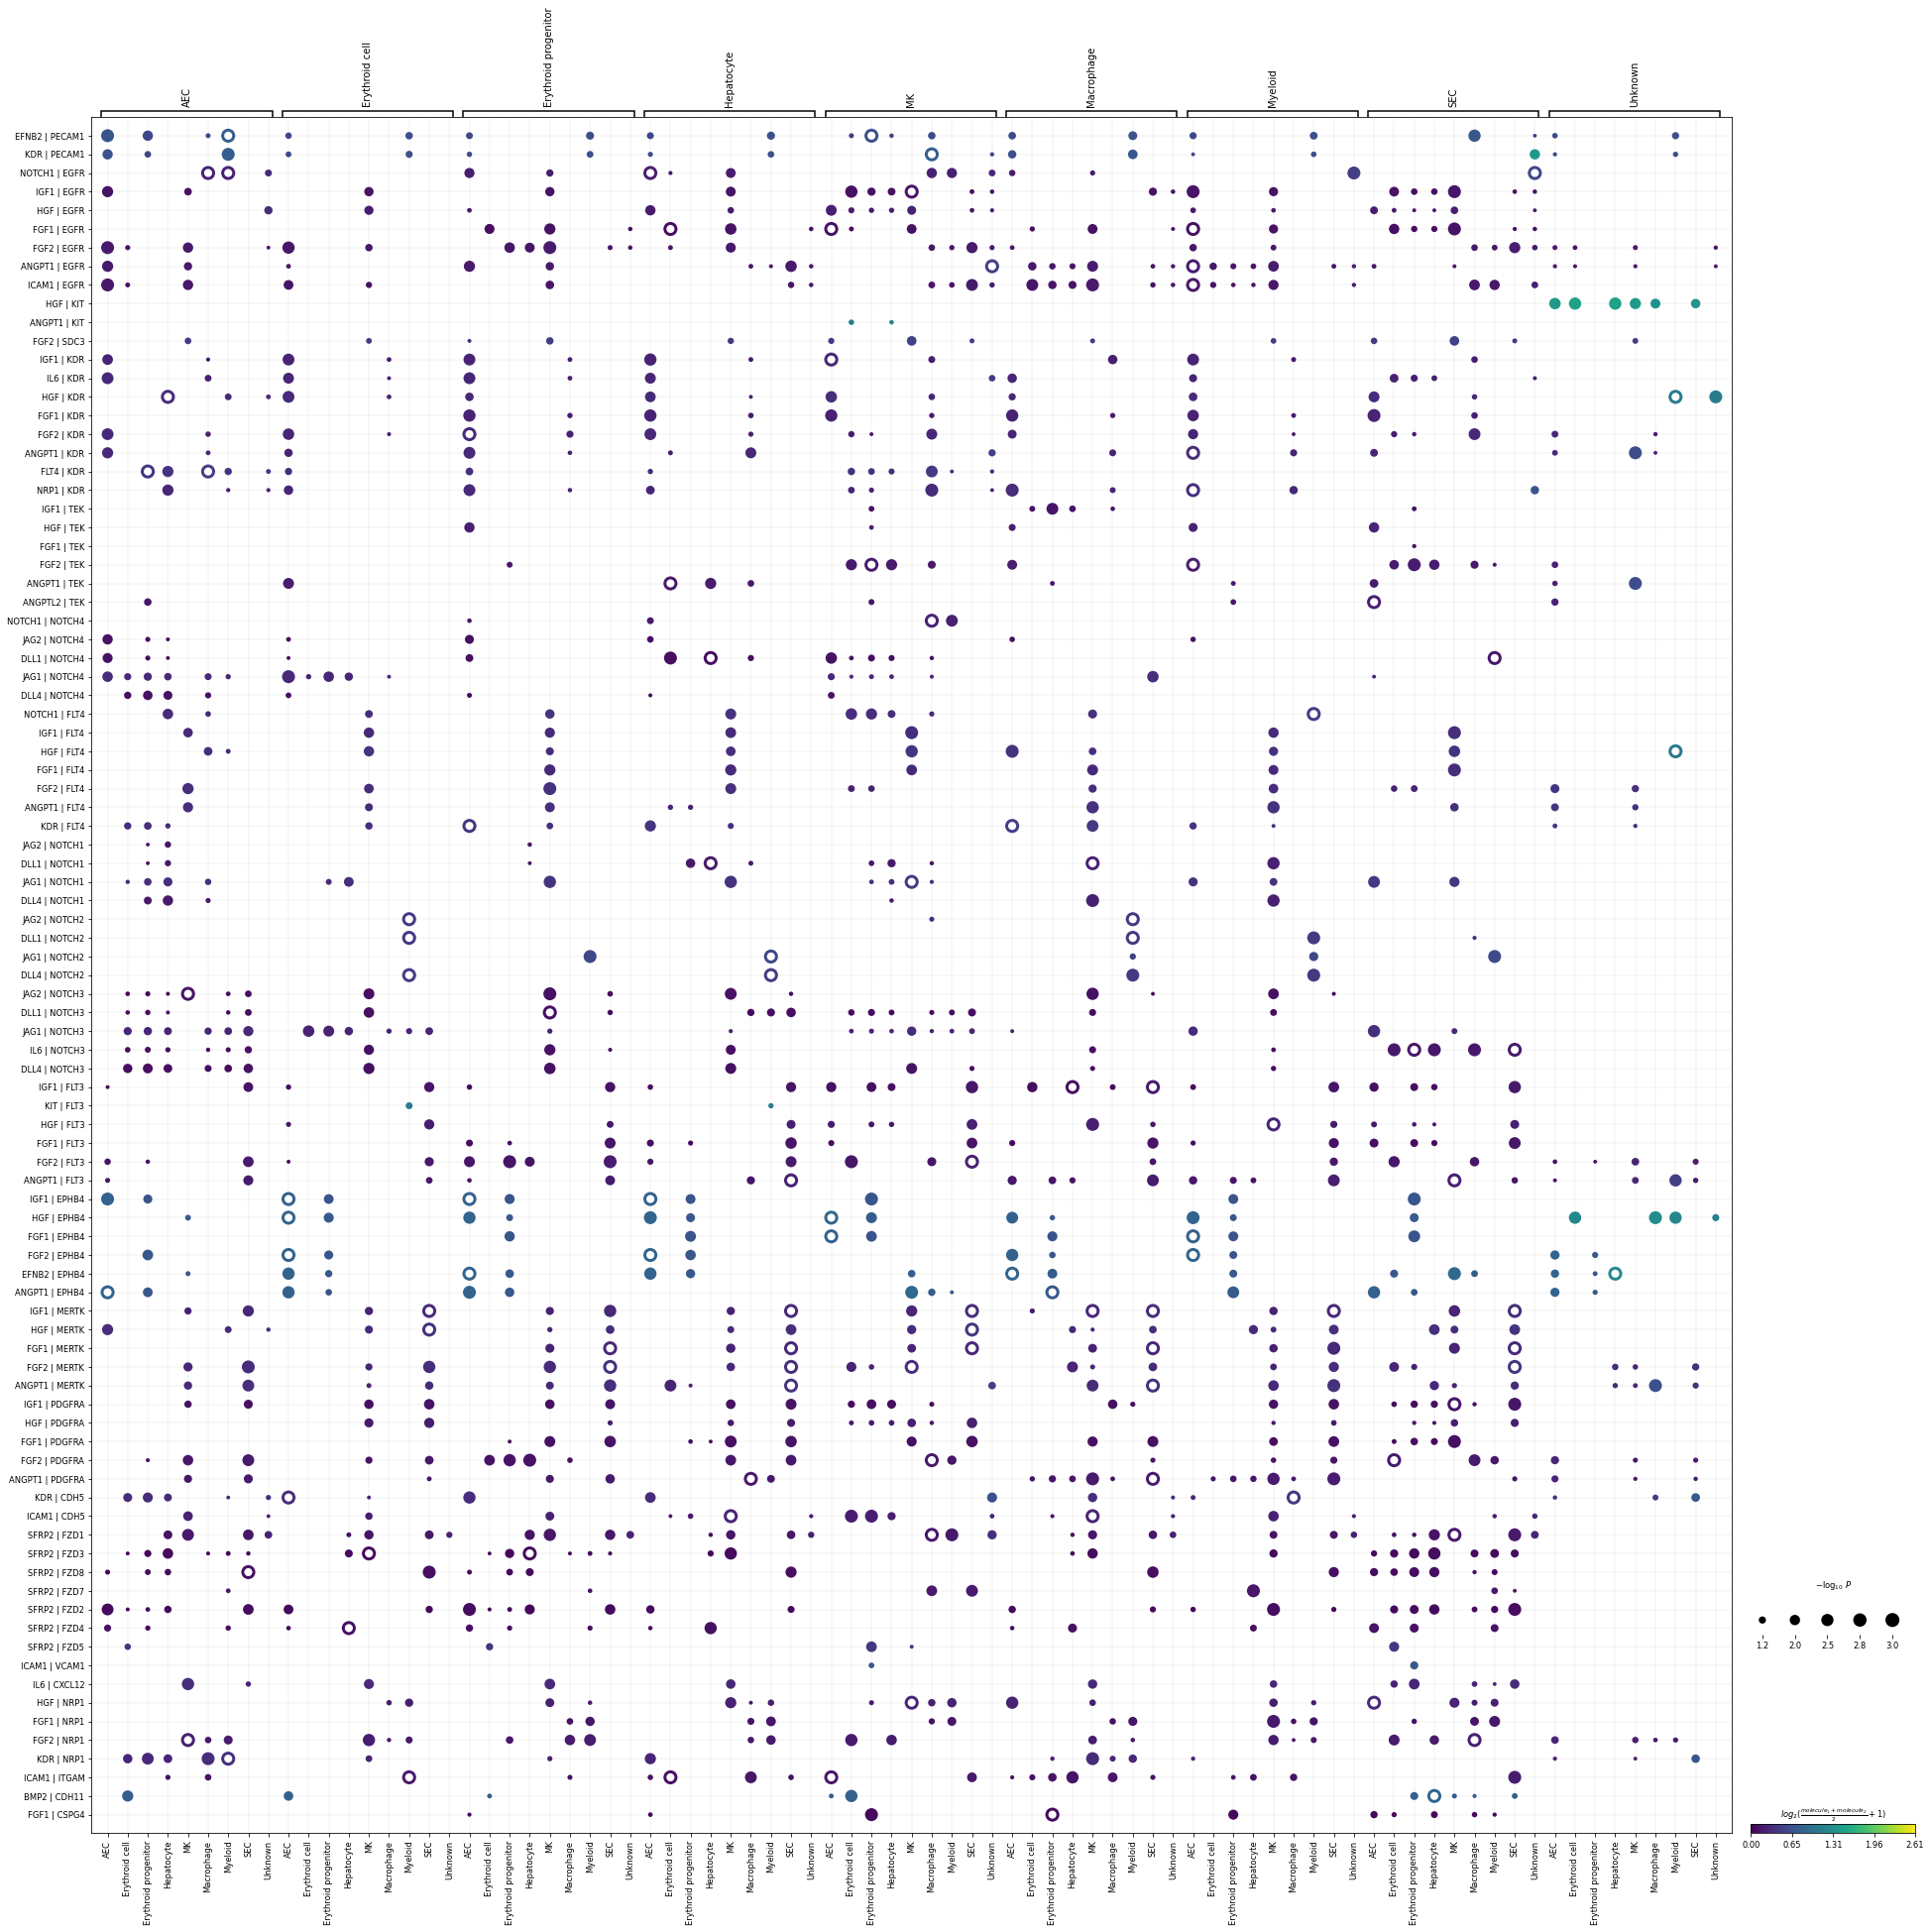

In [4]:
adata = interpreter.data.ligrec(fraction=0.2)

In [24]:
adata.uns['CellTypeID_new_preprocessed_ligrec']['metadata'].to_csv("../cellphoneDB/merfish_fetal_liver_cellphoneDB.csv")

In [ ]:
import pandas as pd
list(pd.read_csv("../cellphoneDB/merfish_fetal_liver_cellphoneDB.csv")['source'])

In [28]:

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

['EFNB2',
 'KDR',
 'NOTCH1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'ICAM1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'FGF2',
 'IGF1',
 'IL6',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'FLT4',
 'NRP1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'ANGPTL2',
 'NOTCH1',
 'JAG2',
 'DLL1',
 'JAG1',
 'DLL4',
 'NOTCH1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'KDR',
 'JAG2',
 'DLL1',
 'JAG1',
 'DLL4',
 'JAG2',
 'DLL1',
 'JAG1',
 'DLL4',
 'JAG2',
 'DLL1',
 'JAG1',
 'IL6',
 'DLL4',
 'IGF1',
 'KIT',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'EFNB2',
 'ANGPT1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'IGF1',
 'HGF',
 'FGF1',
 'FGF2',
 'ANGPT1',
 'KDR',
 'ICAM1',
 'SFRP2',
 'SFRP2',
 'SFRP2',
 'SFRP2',
 'SFRP2',
 'SFRP2',
 'SFRP2',
 'ICAM1',
 'IL6',
 'HGF',
 'FGF1',
 'FGF2',
 'KDR',
 'ICAM1',
 'BMP2',
 'FGF1',
 'VWF',
 'VWF']


# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

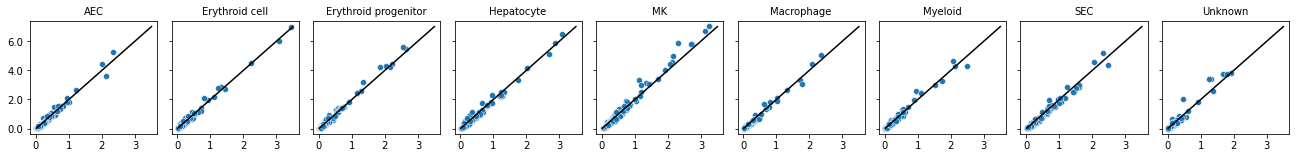

In [24]:
interpreter.data.noise_structure(max_x=3.5)